## 1. Load Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('http://neueda.conygre.com/pydata/ml_fc/mnist8x8.csv')
print(df.shape)
df.head()

(1797, 65)


,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## 2. Analyse/Shape/Clean Data

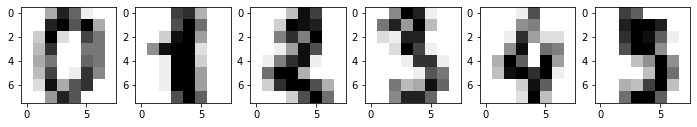

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

num_plots = 6

fig, axes = plt.subplots(1, num_plots, figsize=(12, 7))

for i in range(num_plots):
    data = df.iloc[i, :-1].to_numpy()
    axes[i].imshow( np.reshape(data, (8, 8)), cmap=plt.cm.gray_r )

## 3. Select independent and dependent variables

In [4]:
X = df.iloc[:, :-1]

y = df['label']

## 4. Train-test split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## 5. Select, configure and train model

In [6]:
# TODO:Pick a classification model
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(50, 32), max_iter=500)

model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 32), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## 6. Verification with a confusion matrix

Confusion matrix:
 [[11  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  1  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0]
 [ 0  0  0  0  1  0  1 18  0  0]
 [ 0  1  0  1  0  1  0  0 20  0]
 [ 0  0  0  0  0  1  0  1  0 22]]
Accuracy: 0.9555555555555556


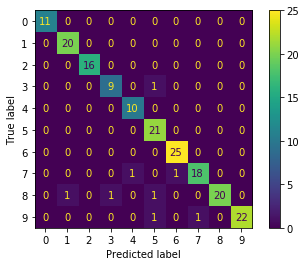

In [7]:
from sklearn import metrics

disp = metrics.plot_confusion_matrix(model, X_test, y_test)

print("Confusion matrix:\n", disp.confusion_matrix)
cmatrix = disp.confusion_matrix

correct = 0
for i in range(len(cmatrix)):
        correct += cmatrix[i][i]

print('Accuracy:', correct / cmatrix.sum())

plt.show()

In [8]:
!pip install tensorflow keras

In [9]:
import datetime
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(50, input_dim=64, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dense(32, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dense(10, kernel_initializer='normal', activation='softmax'))

In [10]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=X_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(X_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/5
51/51 [==============================] - 1s 9ms/step - loss: 1.8035 - accuracy: 0.4997 - val_loss: 1.1221 - val_accuracy: 0.7833
Epoch 2/5
51/51 [==============================] - 0s 3ms/step - loss: 0.6495 - accuracy: 0.8522 - val_loss: 0.4401 - val_accuracy: 0.8889
Epoch 3/5
51/51 [==============================] - 0s 3ms/step - loss: 0.3031 - accuracy: 0.9264 - val_loss: 0.2244 - val_accuracy: 0.9556
Epoch 4/5
51/51 [==============================] - 0s 3ms/step - loss: 0.1979 - accuracy: 0.9493 - val_loss: 0.1781 - val_accuracy: 0.9611
Epoch 5/5
51/51 [==============================] - 0s 3ms/step - loss: 0.1532 - accuracy: 0.9579 - val_loss: 0.1634 - val_accuracy: 0.9500


Take a look at the classes predicted by the model for the test data

In [11]:
import numpy as np
predicted = np.argmax(model.predict(X_test), axis=1)
predicted

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       9, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 5, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 1, 5, 5, 2, 5, 9, 0, 7, 1, 4, 4,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 0, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7], dtype=int64)

Consider the accuracy of the model with a confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix

cmatrix = confusion_matrix(y_test, predicted)

print(cmatrix)

correct = 0
for i in range(len(cmatrix)):
    correct += cmatrix[i][i]
    
print('Accuracy:', correct / cmatrix.sum())

[[11  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  1]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  1  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0]
 [ 0  1  0  0  0  0 24  0  0  0]
 [ 0  0  0  0  2  0  0 18  0  0]
 [ 1  2  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  1  0  0  0 23]]
Accuracy: 0.95


tensorboard is a tool that can analyse the logs from a training run of a tensorflow model 

In [13]:
%load_ext tensorboard

In [14]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 1532), started 2:35:17 ago. (Use '!kill 1532' to kill it.)